# Assignment 04 Deep learning and backpropagation

## 复习上课内容以及复现课程代码

参考`Lecture-04.ipynb`

## 理论题目

### What does a nueron compute?

神经元的计算包括线性变换和非线性变化两部分。

线性变换：$z = wx + b$

非线性变换： $a = \sigma (z)$

### Why we use non-linear activation functions in neural networks?

如果没有非线性变换，深层的神经网络的效果以单层的神经网络的效果一样。

$$\hat{y} = W^{[1]}*W^{[2]} ... W^{[n]}*X + b = W*X + b$$

### What's is the Logistic Loss?

逻辑回归通过`sigmoid`的函数把$(-\infty, +\infty)$的数映射到$(0, 1)$区间上。逻辑回归常用二分类问题。

$$\sigma(z) = \frac{1}{1+e^{-z}}$$

### Assume that you are building a binary classifier for dectecting if an image containing cats, which activation function would you recommend using for the output layer?

A. ReLU    
B. Leaky ReLU    
C. sigmoid    
D. tanh  

C

### Why we don't use zero initialization for all parameters?

一层多个神经元的效果与一个神经元的效果是一样的。

### Can you implemented the softmax function using Python?

In [11]:
import numpy as np

In [23]:
def softmax(X):
    X = X - np.max(X)
    return np.exp(X) / np.sum(np.exp(X))

In [25]:
# softmax([1, 3, 4])

## 实践题

### Build a simple digits recognizer to check if the digit in the image is lager than 5?

#### **Package Dependencies**

In [28]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### Overview the datasets

In [40]:
digist_dataset = datasets.load_digits()

In [47]:
digist_dataset.data.shape, digist_dataset.target.shape

((1797, 64), (1797,))

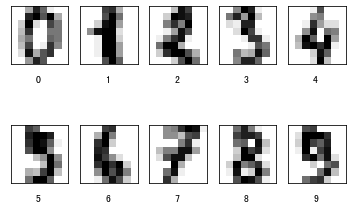

In [48]:
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(digist_dataset.data[i-1].reshape([8,8]),cmap=plt.cm.gray_r)
    plt.text(3,10,str(digist_dataset.target[i-1]))
    plt.xticks([])
    plt.yticks([])

In [57]:
# split the dataset into training and test set

X_train, X_test, y_train, y_test = train_test_split(digist_dataset.data, digist_dataset.target, test_size=0.25)

In [54]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1347, 64), (450, 64), (1347,), (450,))

In [60]:
# reform the label.
# If the digit is smaller than 5, the label is 0.
# If the digit is larger than 5, the label is 1.

y_train[y_train < 5] = 0
y_train[y_train >= 5] = 1
y_test[y_test < 5] = 0
y_test[y_test >= 5] = 1

#### Architecture of Neural Network

**Mathematical expression of the algorithm**

$$z^{(i)} = W^T  * x^{(i)} + b$$

$$ \hat y^{(i)}=a^{(i)} = \sigma (z^{(i)})$$

$$L(y_i, \hat{y_i}) = -y_i*\log{\hat y_i} - (1-y_i)\log(1-\hat{y_i})$$

**The total cost over all training examples**

$$J = \frac{1}{m} \sum{L(y_i, \hat{y_i})}$$

#### Building the alogrithm

**1. Activation function**

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

In [295]:
def sigmoid(x:list):
    _sigmoid = lambda x: 1 / (1 + np.exp(-x))
    return list(map(_sigmoid, x))

In [293]:
# sigmoid(np.array([-1, 0, 1, 2]))

**2. Initialize Parameters**

In [226]:
# Random innitialize the parameters

def initialize_parameters(dim):
    '''
    Argument: dim -- size of the w vector
    
    Returns:
    w -- initialized vector of shape (dim,1)
    b -- initializaed scalar
    '''
    
    w = np.random.randn(dim, 1)
    b = np.random.random()
    
    assert(w.shape == (dim,1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w,b

In [126]:
# initialize_parameters(10)

**3. Forward and Backward Propagation**

Forward Propagation:   
. X    
. A = $\sigma(w^T*X+b) = (a^{(1)},a^{(2)},...,a^{(m)})$   
. J = $-\frac{1}{m} \sum_{i=1}^{m}y^{(i)}log(a^{(i)}+(1-y^{(i)})log(1-a^{(i)})$       

Some derivative: 
$$\frac{\partial{J}}{\partial{w}} = \frac{1}{m}X*(A-Y)^T$$   
$$\frac{\partial{J}}{\partial{b}} = \frac{1}{m}\sum_{i=1}^m(a^{(i)}-y^{(i)}) $$

$$J(y_i, \hat{y_i}) = -\frac{1}{m}\sum[y_i*\log{\hat y_i} + (1-y_i)\log(1-\hat{y_i})]$$

In [269]:
def cost_cross_entropy(y, y_hat):
    """
    Cross entropy
    """
    y = np.array(y)
    y_hat = np.array(y_hat)
    assert y.shape == y_hat.shape
           
    return -np.sum([yi*np.log(yi_hat) + (1-yi)*np.log(1-yi_hat) for yi, yi_hat in zip(y, y_hat)])/y.shape[0]

In [243]:
# cost([1, 1, 0], [.99, .99, .01]), cross_entropy([1, 0, 1], [.99, 0.99, 0.88])

In [297]:

def propagate(w, b, X, Y):
    '''
    Forward and backward propagation.
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    '''
    def forward_propagation(W, b, X):
        """
        Forward Propagaion.
        """
        return sigmoid(np.dot(W, X) + b)

    def backward_propagation(A, Y):
        """
        Backward Propagation.

        Param A: linear transformation ouput, shape (sample_num, feature_num)
        """
        partial_w = np.dot(X, (A - Y).T) / X.shape[0]
        partial_b = np.sum([A - Y]) / A.shape[0]

        return partial_w, partial_b


    m = X.shape[1]

    # forward propagation.
    A = forward_propagation(w, b, X)
    cost = cost_cross_entropy(Y, A)

    # backward propagation.
    dw, db = backward_propagation(A, Y)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())

    # backward TODO

    grads = {'dw':dw,
             'db':db}

    return grads, cost

TODO

**4. Optimization**

Minimizing the cost function using gradient descent.
$$ \theta = \theta - \alpha * d\theta$$
where the $\alpha$ is the learning rate.

In [115]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    '''
    This function optimize w and b by running a gradient descen algorithm
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params - dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    '''
    
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = None
        
        dw = grads['dw']
        db = grads['db']
        
        w = None
        b = None
        
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w":w,
              "b":b}
    
    grads = {"dw":dw,
             "db":db}
    
    return params, grads, costs

**5. Predict**

Two steps to finish this task:   
1. Calculate $\hat{Y} = A = \sigma(w^T*X+b)$   
2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector Y_prediction. If you wish, you can use an if/else statement in a for loop (though there is also a way to vectorize this).

In [118]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights
    b -- bias 
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0],1)
    
    A = None
    
    for i in range(A.shape[i]):
        None 
    
    assert(Y_prediction.shape == (1,m))
    
    return Y_prediction

TODO

**5. Merge functions into a model**

In [122]:
def model(X_train, Y_trein, X_test, Y_test, num_iterations, learning_rate,print_cost):
    """
    Build the logistic regression model by calling all the functions you have implemented.
    Arguments:
    X_train - training set
    Y_train - training label
    X_test - test set
    Y_test - test label
    num_iteration - hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d - dictionary should contain following information w,b,training_accuracy, test_accuracy,cost
    eg: d = {"w":w,
             "b":b,
             "training_accuracy": traing_accuracy,
             "test_accuracy":test_accuracy,
             "cost":cost}
    """
    None

TODO

## 选做题

### Observe the effect of learning rate on the learning process

tips: plot the learning curve with different learning rate.

TODO

### Observe the effect of iteration_num on the test accuracy.

TODO

## Challenge

Try use softmax function to build a model to recognize which digits is the image?

TODO